<a href="https://colab.research.google.com/github/Amit-Baviskar/CodSoft-Internship-Program/blob/main/Credit_Card_Fraud_Detection_AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD FRAUD DETECTION**


## **Problem Statement:**


Credit card fraud represents a major financial threat to both consumers and financial institutions. It is crucial for credit card providers to implement effective methods for detecting fraudulent transactions, ensuring that customers are not held responsible for unauthorized charges.

## **Introduction:**

In the modern digital age, credit card transactions are central to daily financial activities. However, this convenience also introduces the risk of fraudulent transactions. Credit card fraud can result in considerable financial losses and erode trust in financial systems. Therefore, identifying and preventing fraudulent transactions is a top priority for financial institutions and businesses alike.

Detecting credit card fraud presents several challenges:

1. **Severe Data Imbalance:** Fraudulent transactions are a tiny portion of the total dataset, making it difficult for machine learning models to identify patterns and predict fraud effectively.
  
2. **Evolving Fraud Tactics:** Fraudsters continuously modify their strategies, so fraud detection systems need to adapt and stay ahead.

3. **Consequences of False Positives:** Incorrectly flagging legitimate transactions as fraud can frustrate customers and damage the reputation of financial service providers.

This project aims to offer an innovative, scalable solution for detecting credit card fraud, enhancing financial security, and building trust among customers.

## **Dataset Overview:**

The dataset for this project consists of credit card transactions conducted by European cardholders in September 2013 over a period of two days. With a total of 284,807 transactions, only 492 (0.172%) are labeled as fraudulent, making the dataset extremely imbalanced.

### **Key details about the dataset:**

### **Features:**
- **V1, V2, ..., V28:** These are the principal components derived from PCA (Principal Component Analysis), as the original features are confidential.
- **Time:** Time elapsed (in seconds) since the first transaction in the dataset.
- **Amount:** The monetary value of the transaction, which could be useful for cost-sensitive learning.

### **Target Variable:**

- **Class:** A binary variable indicating whether the transaction is fraudulent (1) or genuine (0).

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization and enhanced plots
import numpy as np  # For numerical computing and working with arrays
import warnings  # For managing warnings in the code
warnings.filterwarnings("ignore")  # Ignore warnings during execution


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [ ]:
data=pd.read_csv("/content/creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data.shape

(284807, 31)

In [ ]:
# Convert 'Time' column to datetime format using seconds as unit
data['Time'] = pd.to_datetime(data['Time'], unit='s')

# Extract the year from the 'Time' column and create a new 'Year' column
data['Year'] = data['Time'].dt.year

# Print the count of transactions per year
print(data['Year'].value_counts())


Year
1970    284807
Name: count, dtype: int64


In [ ]:
# Extract the month from the 'Time' column and create a new 'Month' column
data['Month'] = data['Time'].dt.month

# Print the count of transactions per month
print(data['Month'].value_counts())


Month
1    284807
Name: count, dtype: int64


In [ ]:
# Extract the day of the week from the 'Time' column
data['DayOfWeek'] = data['Time'].dt.day_name()

# Print the value counts for each day of the week
print(data['DayOfWeek'].value_counts())

DayOfWeek
Thursday    144786
Friday      140021
Name: count, dtype: int64


In [ ]:
# Extract the hour of the day from the 'Time' column
data['Hour'] = data['Time'].dt.hour

# Print the value counts for each hour of the day
print(data['Hour'].value_counts())

Hour
21    17703
18    17039
11    16856
20    16756
10    16598
14    16570
15    16461
16    16453
17    16166
9     15838
19    15649
22    15441
12    15420
13    15365
23    10938
8     10276
0      7695
7      7243
1      4220
6      4101
3      3492
2      3328
5      2990
4      2209
Name: count, dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 35 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Time       284807 non-null  datetime64[ns]
 1   V1         284807 non-null  float64       
 2   V2         284807 non-null  float64       
 3   V3         284807 non-null  float64       
 4   V4         284807 non-null  float64       
 5   V5         284807 non-null  float64       
 6   V6         284807 non-null  float64       
 7   V7         284807 non-null  float64       
 8   V8         284807 non-null  float64       
 9   V9         284807 non-null  float64       
 10  V10        284807 non-null  float64       
 11  V11        284807 non-null  float64       
 12  V12        284807 non-null  float64       
 13  V13        284807 non-null  float64       
 14  V14        284807 non-null  float64       
 15  V15        284807 non-null  float64       
 16  V16        284807 no

## **Data Exploratory Analysis :**

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
# unique number of transition -  fraudulent (1) or genuine (0)
data['Class'].unique()

array([0, 1])

In [ ]:
# Calcualting the percentahge of fraudulent (1) or genuine (0)

round(data['Class'].value_counts()/data.shape[0]*100,2)

,count
Class,
0,99.83
1,0.17


In [ ]:
# Separating the genuine and fraudulent transaction records

gen = data[data['Class'] == 0]  # Genuine transactions
fra = data[data['Class'] == 1]  # Fraudulent transactions

# Display the first few rows of genuine transactions
print(gen.head())

# Display the number of rows and columns of genuine transactions
print(f"\nNumber of rows and columns of genuine transactions: {gen.shape}")


                 Time        V1        V2        V3        V4        V5  \
0 1970-01-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 1970-01-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 1970-01-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 1970-01-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 1970-01-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...       V25       V26       V27  \
0  0.462388  0.239599  0.098698  0.363787  ...  0.128539 -0.189115  0.133558   
1 -0.082361 -0.078803  0.085102 -0.255425  ...  0.167170  0.125895 -0.008983   
2  1.800499  0.791461  0.247676 -1.514654  ... -0.327642 -0.139097 -0.055353   
3  1.247203  0.237609  0.377436 -1.387024  ...  0.647376 -0.221929  0.062723   
4  0.095921  0.592941 -0.270533  0.817739  ... -0.206010  0.502292  0.219422   

        V28  Amount  Class  Year  Month  DayOfWeek  Hour  
0 -0.0210

In [ ]:
# Display the first few rows of fraudulent transactions
print(fra.head())

# Display the number of rows and columns of fraudulent transactions
print(f"\nNumber of rows and columns of fraudulent transactions: {fra.shape}")


                    Time        V1        V2        V3        V4        V5  \
541  1970-01-01 00:06:46 -2.312227  1.951992 -1.609851  3.997906 -0.522188   
623  1970-01-01 00:07:52 -3.043541 -3.157307  1.088463  2.288644  1.359805   
4920 1970-01-01 01:14:22 -2.303350  1.759247 -0.359745  2.330243 -0.821628   
6108 1970-01-01 01:56:26 -4.397974  1.358367 -2.592844  2.679787 -1.128131   
6329 1970-01-01 02:05:19  1.234235  3.019740 -4.304597  4.732795  3.624201   

            V6        V7        V8        V9  ...       V25       V26  \
541  -1.426545 -2.537387  1.391657 -2.770089  ...  0.044519  0.177840   
623  -1.064823  0.325574 -0.067794 -0.270953  ...  0.279798 -0.145362   
4920 -0.075788  0.562320 -0.399147 -0.238253  ... -0.156114 -0.542628   
6108 -1.706536 -3.496197 -0.248778 -0.247768  ...  0.252405 -0.657488   
6329 -1.357746  1.713445 -0.496358 -1.282858  ...  1.488901  0.566797   

           V27       V28  Amount  Class  Year  Month  DayOfWeek  Hour  
541   0.261145 -0.14

In [ ]:
# Amount seen this in genuine cases tranasction
gen["Amount"].describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
# Amount seen this in fradulent cases tranasction
fra["Amount"].describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


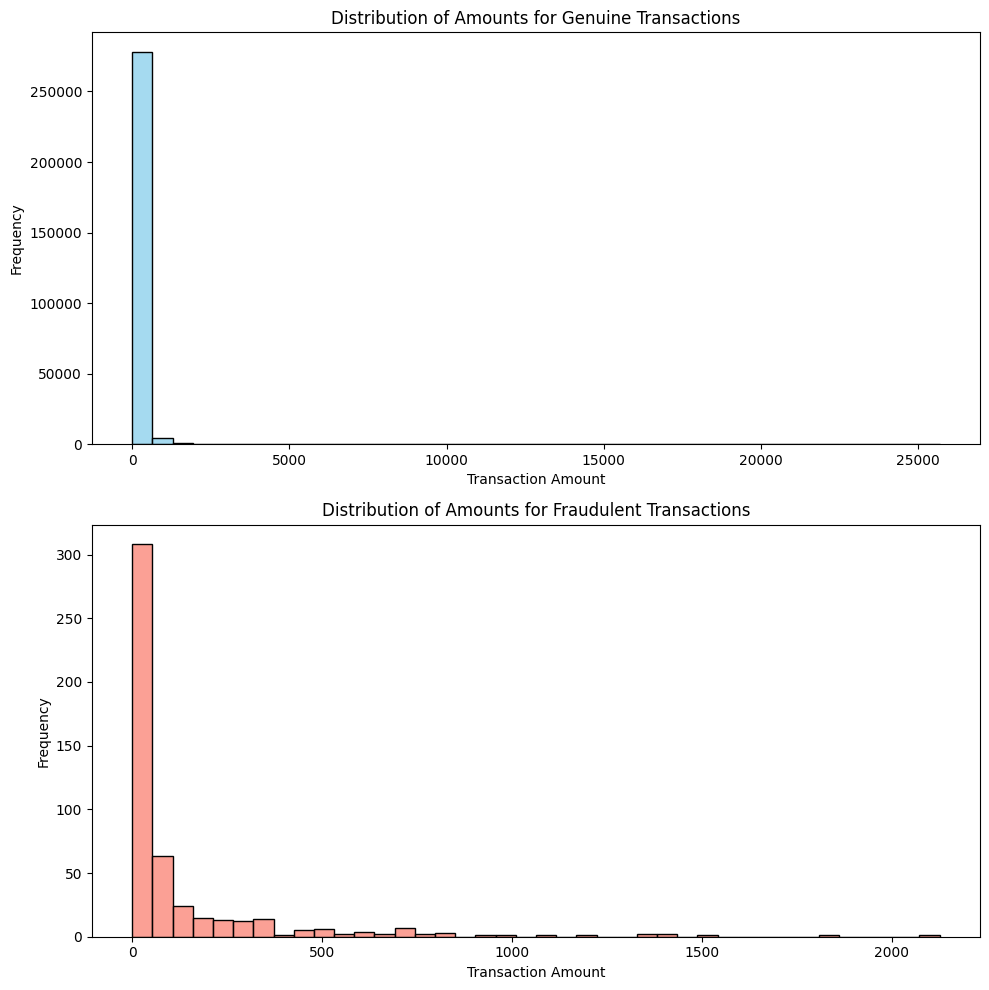

In [ ]:
# Create a figure with two subplots (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Set the number of bins for the histograms
bins = 40

# Plot the histogram for genuine transaction amounts with a different color
sns.histplot(gen["Amount"], ax=axes[0], kde=False, bins=bins, color='skyblue')
axes[0].set_title('Distribution of Amounts for Genuine Transactions')
axes[0].set_xlabel('Transaction Amount')
axes[0].set_ylabel('Frequency')

# Plot the histogram for fraudulent transaction amounts with a different color
sns.histplot(fra["Amount"], ax=axes[1], kde=False, bins=bins, color='salmon')
axes[1].set_title('Distribution of Amounts for Fraudulent Transactions')
axes[1].set_xlabel('Transaction Amount')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


## **Insights on Genuine Transactions:**


**Transaction Distribution:**

 A majority of genuine transactions involve smaller amounts, with most falling under 100 units. This reflects typical consumer spending patterns.
Statistical Range: The average amount for genuine transactions is around 88.29 units, with the highest recorded transaction reaching 25,691.16 units, suggesting that large-value transactions are uncommon but do occur occasionally.

**Insights on Fraudulent Transactions:**

Transaction Distribution: Similar to genuine transactions, fraudulent transactions are predominantly concentrated in the lower range of amounts, mostly under 500 units. However, fraudulent transactions show a slightly wider spread in values compared to genuine ones.


**Statistical Range:**

 The average amount of fraudulent transactions is higher at 122.11 units, with the maximum amount recorded at 2,125.87 units. This suggests that fraudulent transactions tend to involve moderately higher amounts when compared to genuine transactions.

In [ ]:
# Hour of the day for genuine transactions
print(gen['Hour'].value_counts())

# Hour of the day for fraudulent transactions
print(fra['Hour'].value_counts())

Hour
21    17687
18    17006
11    16803
20    16738
10    16590
14    16547
15    16435
16    16431
17    16137
9     15822
19    15630
22    15432
12    15403
13    15348
23    10917
8     10267
0      7689
7      7220
1      4210
6      4092
3      3475
2      3271
5      2979
4      2186
Name: count, dtype: int64
Hour
2     57
11    53
18    33
17    29
15    26
4     23
7     23
14    23
16    22
23    21
19    19
20    18
13    17
12    17
3     17
9     16
21    16
5     11
1     10
8      9
6      9
22     9
10     8
0      6
Name: count, dtype: int64


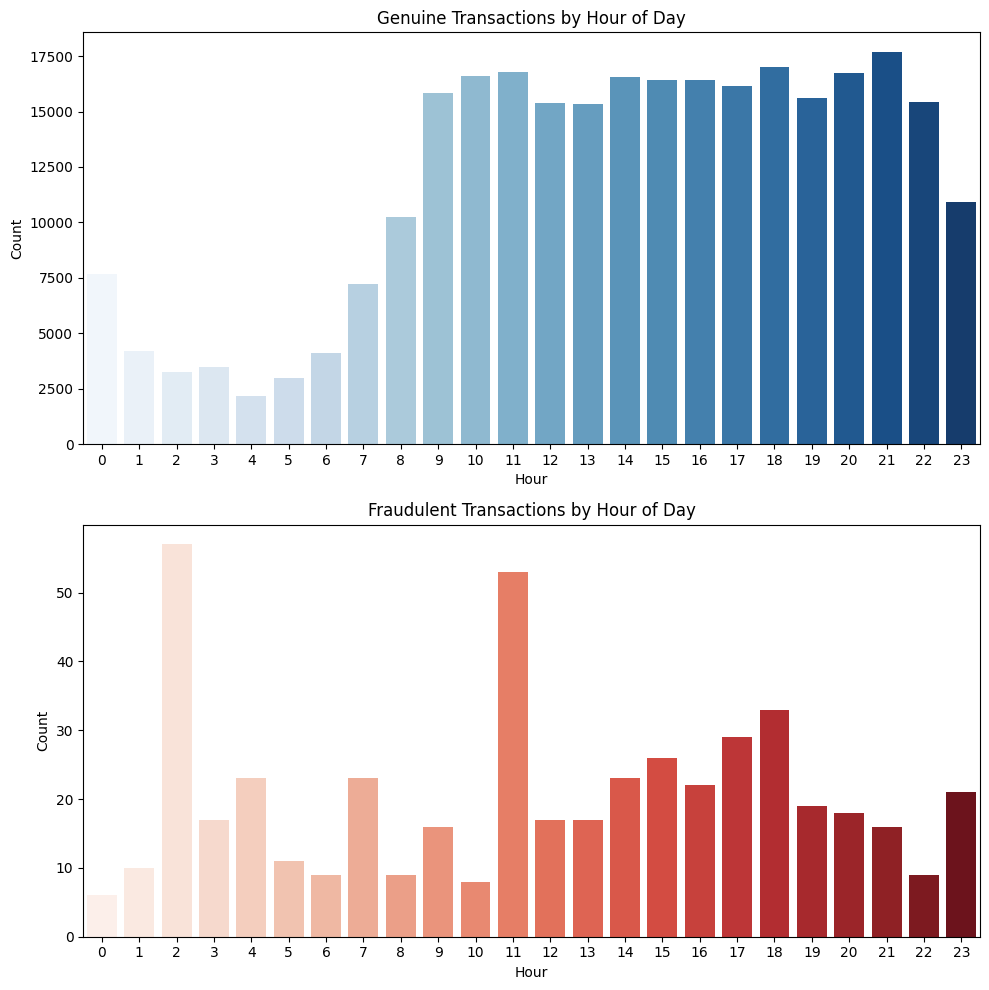

In [ ]:
# Create a figure with 2 subplots (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot the countplot for genuine transactions with a custom color palette
sns.countplot(x='Hour', data=gen, ax=axes[0], palette='Blues')
axes[0].set_title('Genuine Transactions by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Count')

# Plot the countplot for fraudulent transactions with a different custom color palette
sns.countplot(x='Hour', data=fra, ax=axes[1], palette='Reds')
axes[1].set_title('Fraudulent Transactions by Hour of Day')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Count')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


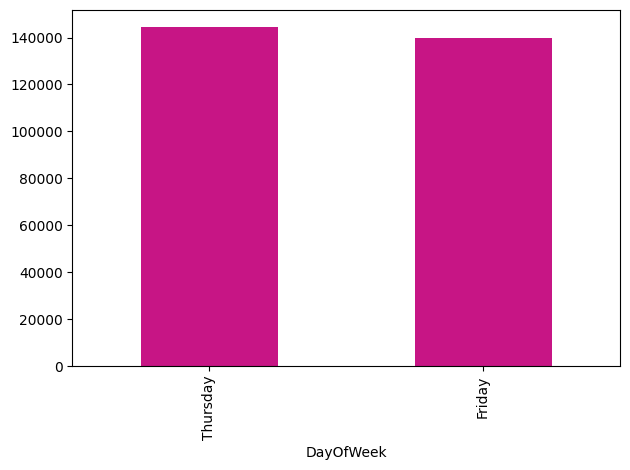

In [ ]:
# Plot for fraudulent transactions
fraudulent_counts = gen['DayOfWeek'].value_counts()
fraudulent_counts.plot(kind='bar', color='mediumvioletred', label='Fraudulent')  # Changed color
axes[1].set_title('Fraudulent Transactions by Day of Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.tight_layout()
plt.show()


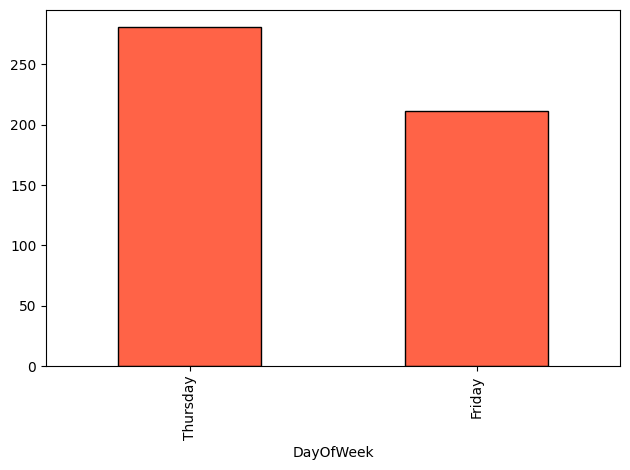

In [ ]:
# Plot for fraudulent transactions
fraudulent_counts = fra['DayOfWeek'].value_counts()
fraudulent_counts.plot(kind='bar', color='#FF6347', label='Fraudulent', edgecolor='black')  # Updated color and added edgecolor

# Customize the title and labels
axes[1].set_title('Fraudulent Transactions by Day of Week', fontsize=16, fontweight='bold', color='darkred')
axes[1].set_xlabel('Day of Week', fontsize=14, fontweight='bold', color='darkblue')
axes[1].set_ylabel('Count', fontsize=14, fontweight='bold', color='darkblue')

# Add grid for better readability
axes[1].grid(True, linestyle='--', linewidth=0.7)

# Add a legend with customized font size
axes[1].legend(fontsize=12)

# Show the plot with tight layout
plt.tight_layout()
plt.show()


In [ ]:
data.info()

In [ ]:
 # drop columns= Year, Month ,DayOfWeek, Hour

data = data.drop(['Year', 'Month', 'DayOfWeek', 'Hour'], axis=1)

In [ ]:
# Separate features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

In [ ]:
# Convert 'Time' column back to numeric (seconds since the epoch) for scaling
data['Time'] = data['Time'].astype('int64') // 10**9  # Convert to seconds since the epoch
# Now apply StandardScaler
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Use SMOTE (Synthetic Minority Oversampling Technique) to oversample the minority class and balance the training dataset.
# Handle class imbalance using SMOTE

# Convert 'Time' column back to numeric (seconds since the epoch) before applying SMOTE
X_train['Time'] = X_train['Time'].astype('int64') // 10**9  # Convert to seconds since the epoch

# Now apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Train a Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Train a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train_resampled, y_train_resampled)

# In a Random Forest, multiple decision trees are trained on different subsets of the data,
#and their predictions are aggregated (via majority voting for classification or averaging for regression).
#The parameter n_estimators controls how many decision trees are included in the forest.


# n_estimators=100 means the Random Forest will train 100 decision trees.
# Increases the model's ability to learn complex patterns.Can lead to better accuracy

In [ ]:
# Evaluate both models
models = {'Logistic Regression': logistic_model, 'Random Forest': random_forest_model}

for model_name, model in models.items():
    print(f"\nModel: {model_name}")

    # Convert 'Time' column in X_test to numeric (seconds since the epoch)
    X_test['Time'] = X_test['Time'].astype('int64') // 10**9  # Convert to seconds since the epoch

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate performance
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

### **Fraud Detection Model Analysis and Comparison :**


#### **Logistic Regression:**


###**Confusion Matrix:**

- **True Negatives (56196):** Correctly identified genuine transactions.
- **False Positives (668):** Genuine transactions wrongly predicted as fraudulent.
- **False Negatives (10):** Fraudulent transactions wrongly identified as genuine.
- **True Positives (88):** Correctly predicted fraudulent transactions.

### **Metrics:**

- **Precision (Class 1):** 0.12 — Only 12% of predicted frauds were actually frauds.
- **Recall (Class 1):** 0.90 — Identified 90% of actual fraud cases.
- **F1-Score (Class 1):** 0.21 — Despite high recall, the low precision leads to a low F1 score.
- **Macro Avg Recall:** 0.94 — Good sensitivity overall, but this is skewed by the high recall for Class 0 (genuine transactions).

### **Conclusion:**
- Logistic Regression is highly effective at detecting fraud cases (90% recall), which is critical for minimizing false negatives. However, its precision is low (12%), leading to a high rate of false positives. This can inconvenience customers by flagging genuine transactions as fraudulent.


---

### **Random Forest:**

####**Confusion Matrix:**

- **True Negatives (56861):** Correctly identified genuine transactions.
- **False Positives (3):** Very few genuine transactions misclassified as fraudulent.
- **False Negatives (63):** Fraudulent transactions wrongly identified as genuine.
- **True Positives (35):** Correctly identified fraudulent transactions.


#### **Metrics:**

- **Precision (Class 1):** 0.92 — 92% of fraud predictions were correct, minimizing false positives.
- **Recall (Class 1):** 0.36 — Only 36% of fraud cases were detected, meaning many fraudulent transactions went undetected.
- **F1-Score (Class 1):** 0.51 — A balanced but relatively low score due to the low recall.
- **Macro Avg Recall:** 0.68 — Less sensitive to the minority class (fraudulent transactions) than Logistic Regression.


## **Conclusion:**

- Random Forest is highly accurate when predicting fraud, with very few false positives (3). However, it struggles with recall, meaning it misses a significant portion of fraudulent transactions (63 out of 98). Precision is prioritized over recall in this model, making it more suitable when minimizing inconvenience for legitimate customers is more important than detecting every fraud case.


---

### **Overall Comparison:**

| **Model**            | **Precision** | **Recall** | **F1-Score** | **Macro Avg Recall** |
|----------------------|---------------|------------|--------------|----------------------|
| **Logistic Regression** | 0.12          | 0.90       | 0.21         | 0.94                 |
| **Random Forest**      | 0.92          | 0.36       | 0.51         | 0.68                 |



- **Logistic Regression**: Prioritizes recall, detecting most fraudulent transactions but at the cost of precision, which may result in significant inconvenience to customers.
- **Random Forest**: Prioritizes precision, minimizing false positives, but at the cost of recall, missing many fraud cases.


## **Business Impact and Recommendation:**


- **Logistic Regression** is recommended if the priority is to **minimize false negatives** (missing fraud cases). This approach is useful when the cost of missing fraud (e.g., financial loss due to undetected fraud) is higher than the cost of flagging a legitimate transaction.
  
- **Random Forest** is recommended if the goal is to **minimize false positives** (incorrect fraud alerts), which can help reduce customer dissatisfaction and operational costs.

## **Future Work:**

- Explore advanced models like **Gradient Boosting** or **Deep Learning** to improve both precision and recall.
- Incorporate domain-specific features (e.g., transaction patterns, user behavior) to further enhance model performance.
- Develop a **cost-sensitive approach** to find the optimal balance between false positives and false negatives, factoring in the cost of inconvenience to customers vs. fraud detection accuracy.

## **Conclusion:**


This project demonstrates how machine learning can address real-world challenges in fraud detection. While both models have their strengths, the choice between **Logistic Regression** and **Random Forest** depends on the business context and the trade-offs between false positives and false negatives.